In [1]:
import pandas as pd
import numpy as np

In [2]:
names = ['Dew Point (°C)', 'Dew Max Point (°C)', 'Hour Max Wind Speed', 'Wind (km/h)', 'Wind Burst (km/h)', 'Avg Temp (°C)',
        'Avg Humidity (%)', 'ETO (mm)', 'Acc Joules', 'Cold Hours', 'Rain (mm)', 'Light Hours']
url = 'plague/tomatoes-plagues.csv'
df = pd.read_csv(url, low_memory=False)

In [5]:
size = 12

cols = [col for col in list(df.columns) if 'Unnamed' not in col]
length = len(cols)
print(cols)
df2 = df.iloc[:,length - size:length]
df2.head()

['Fecha', 'Severidad del Problema', 'Problema', 'Empresa', 'RANCHO', 'EQUIPO', 'PARCELA', 'Parcela de origem', 'Tipo de Problema', 'Indicador', 'Unidad', 'Puntos de muestreo', 'Valor Mínimo', 'Valor Máximo', 'Valor Medio', 'Umbral de Control', 'Umbral de Daño', 'Severidad del Indicador', 'Responsable de la actividad', 'Dia de siembra', 'Dia de emergencia', 'Cultivo', 'Semilla', 'Estadio fenológico', 'Día de la cosecha', 'Área de la Parcela', 'SEMANA', 'SEMANAS', 'Temperatura', '%Humedad', 'Rocio', 'Kestrel', '% inc Rocio', '% Inc Kestrel', 'Hora Min', 'Temperatura Mínima', 'Hora Max', 'Temperatura Máxima', 'Humedad mínima (%)', 'Humedad máxima (%)', 'Punto de rocío (ºC)', 'Punto de rocío Maximo (°C)', 'Hora de registro de velocidad máxima de viento', 'Viento (km/h)', 'Ráfaga de viento (km/h)', 'Temperatura Promedio (ºC)', 'Humedad Promedio (%)', 'ETO (mm)', 'Joules Acumulados', 'Horas Frío Efectivas', 'Lluvia (mm)', 'Horas luz']


,Punto de rocío (ºC),Punto de rocío Maximo (°C),Hora de registro de velocidad máxima de viento,Viento (km/h),Ráfaga de viento (km/h),Temperatura Promedio (ºC),Humedad Promedio (%),ETO (mm),Joules Acumulados,Horas Frío Efectivas,Lluvia (mm),Horas luz
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
common = ['Fecha','Severidad del Problema', 'Problema', 'Empresa', 'RANCHO']
print(df.columns)
df_common = df[common]
df_common.head()

Index(['Fecha', 'Severidad del Problema', 'Problema', 'Empresa', 'RANCHO',
       'EQUIPO', 'PARCELA', 'Parcela de origem', 'Tipo de Problema',
       'Indicador',
       ...
       'Unnamed: 16373', 'Unnamed: 16374', 'Unnamed: 16375', 'Unnamed: 16376',
       'Unnamed: 16377', 'Unnamed: 16378', 'Unnamed: 16379', 'Unnamed: 16380',
       'Unnamed: 16381', 'Unnamed: 16382'],
      dtype='object', length=16383)


,Fecha,Severidad del Problema,Problema,Empresa,RANCHO
0,9/14/2020,Equilibrio,Catarina (Coccinellidea),Sino A,PALMAS
1,9/14/2020,Equilibrio,Heliothis virescens (Gusano del Fruto),Sino A,PALMAS
2,9/14/2020,Equilibrio,Barrenador del tallo,Sino A,PALMAS
3,9/14/2020,Equilibrio,Crysopas (Crysoperlaspp.),Sino A,PALMAS
4,9/14/2020,Equilibrio,Spodoptera exigua (Gusano del soldado),Sino A,PALMAS


In [21]:
df3 = pd.concat([df_common, df2], axis=1)
df3.head()

,Fecha,Severidad del Problema,Problema,Empresa,RANCHO,Punto de rocío (ºC),Punto de rocío Maximo (°C),Hora de registro de velocidad máxima de viento,Viento (km/h),Ráfaga de viento (km/h),Temperatura Promedio (ºC),Humedad Promedio (%),ETO (mm),Joules Acumulados,Horas Frío Efectivas,Lluvia (mm),Horas luz
0,9/14/2020,Equilibrio,Catarina (Coccinellidea),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/14/2020,Equilibrio,Heliothis virescens (Gusano del Fruto),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/14/2020,Equilibrio,Barrenador del tallo,Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/14/2020,Equilibrio,Crysopas (Crysoperlaspp.),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9/14/2020,Equilibrio,Spodoptera exigua (Gusano del soldado),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df3.to_csv('plague/temp.csv', index=False, encoding='latin1')

In [2]:
common_names = ['Date', 'Severity', 'Problem', 'Company', 'Ranch']
names = ['Dew Point (°C)', 'Dew Max Point (°C)', 'Hour Max Wind Speed', 'Wind (km/h)', 'Wind Burst (km/h)', 'Avg Temp (°C)',
        'Avg Humidity (%)', 'ETO (mm)', 'Acc Joules', 'Cold Hours', 'Rain (mm)', 'Light Hours']
col_names = common_names + names
f = pd.read_csv('plague/temp.csv', low_memory=False, names=col_names, encoding='latin1', header=1)
f.head()

,Date,Severity,Problem,Company,Ranch,Dew Point (°C),Dew Max Point (°C),Hour Max Wind Speed,Wind (km/h),Wind Burst (km/h),Avg Temp (°C),Avg Humidity (%),ETO (mm),Acc Joules,Cold Hours,Rain (mm),Light Hours
0,9/14/2020,Equilibrio,Heliothis virescens (Gusano del Fruto),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/14/2020,Equilibrio,Barrenador del tallo,Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/14/2020,Equilibrio,Crysopas (Crysoperlaspp.),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/14/2020,Equilibrio,Spodoptera exigua (Gusano del soldado),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9/14/2020,Equilibrio,Heliothis virescens (Gusano del Fruto),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# all nan to zeros
f[names] = f[names].add(0, fill_value=0)
f.head()

,Date,Severity,Problem,Company,Ranch,Dew Point (°C),Dew Max Point (°C),Hour Max Wind Speed,Wind (km/h),Wind Burst (km/h),Avg Temp (°C),Avg Humidity (%),ETO (mm),Acc Joules,Cold Hours,Rain (mm),Light Hours
0,9/14/2020,Equilibrio,Heliothis virescens (Gusano del Fruto),Sino A,PALMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9/14/2020,Equilibrio,Barrenador del tallo,Sino A,PALMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9/14/2020,Equilibrio,Crysopas (Crysoperlaspp.),Sino A,PALMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9/14/2020,Equilibrio,Spodoptera exigua (Gusano del soldado),Sino A,PALMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9/14/2020,Equilibrio,Heliothis virescens (Gusano del Fruto),Sino A,PALMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
f.groupby('Cold Hours').size()

Cold Hours
0.0     24939
0.1       174
0.2       126
0.3        11
0.4       292
        ...  
11.2       72
11.4       18
11.5       47
12.5       45
13.0      116
Length: 88, dtype: int64

In [5]:
f.groupby('Date').size()

Date
1/10/2021    124
1/11/2021    200
1/12/2021    214
1/13/2021    285
1/14/2021    216
            ... 
9/26/2020    114
9/27/2020    114
9/28/2020     90
9/29/2020    140
9/30/2020    117
Length: 213, dtype: int64

In [6]:
f.groupby('Problem').size() # returns a series

Problem
Abejas                                           14
Agallas de la corona                              4
Alternaria spp.                                2382
Babosas                                           3
Barrenador del tallo                             68
Bemisia spp. (Mosca blanca )                    192
Botritys (Botrytis cinerea)                    1975
Brevipalpus spp. (Ácaro rojo)                  5143
Caracoles                                         2
Catarina (Coccinellidea)                        672
Chinche asesina (Reduviidae)                     29
Chinche pirata (Orius spp.)                      12
Crecimiento Vegetativo                           12
Crysopas (Crysoperlaspp.)                       199
Drosophila suzukii (hembra)                       7
Drosophila suzukii (macho)                        1
Drosophilla Suzukii                              87
Escamas                                           1
Escarabajo colops (Collops spp.)                  7
Gall

In [7]:
prob = f.groupby('Problem').size()
prob['Abejas']

14

In [8]:
sev = list(f.groupby('Severity').size().index)
sev

['Controle', 'Daño', 'Equilibrio']

In [9]:
prob_dicts = {}
sep = '-'
for p in list(prob.index):
    for s in sev:
        d = {n: [] for n in names}
        prob_dicts[p + sep + s] = d
        
prob_dicts

{'Abejas-Controle': {'Dew Point (°C)': [],
  'Dew Max Point (°C)': [],
  'Hour Max Wind Speed': [],
  'Wind (km/h)': [],
  'Wind Burst (km/h)': [],
  'Avg Temp (°C)': [],
  'Avg Humidity (%)': [],
  'ETO (mm)': [],
  'Acc Joules': [],
  'Cold Hours': [],
  'Rain (mm)': [],
  'Light Hours': []},
 'Abejas-Daño': {'Dew Point (°C)': [],
  'Dew Max Point (°C)': [],
  'Hour Max Wind Speed': [],
  'Wind (km/h)': [],
  'Wind Burst (km/h)': [],
  'Avg Temp (°C)': [],
  'Avg Humidity (%)': [],
  'ETO (mm)': [],
  'Acc Joules': [],
  'Cold Hours': [],
  'Rain (mm)': [],
  'Light Hours': []},
 'Abejas-Equilibrio': {'Dew Point (°C)': [],
  'Dew Max Point (°C)': [],
  'Hour Max Wind Speed': [],
  'Wind (km/h)': [],
  'Wind Burst (km/h)': [],
  'Avg Temp (°C)': [],
  'Avg Humidity (%)': [],
  'ETO (mm)': [],
  'Acc Joules': [],
  'Cold Hours': [],
  'Rain (mm)': [],
  'Light Hours': []},
 'Agallas de la corona-Controle': {'Dew Point (°C)': [],
  'Dew Max Point (°C)': [],
  'Hour Max Wind Speed': [],


In [10]:
f['Severity'].str.contains('Equilibrio')

0        True
1        True
2        True
3        True
4        True
         ... 
33550    True
33551    True
33552    True
33553    True
33554    True
Name: Severity, Length: 33555, dtype: bool

In [13]:
eq = f[f['Severity'].str.contains('Equilibrio')]
eq_bees = eq[eq['Problem'].str.contains('Abejas')]
eq_bees

,Date,Severity,Problem,Company,Ranch,Dew Point (°C),Dew Max Point (°C),Hour Max Wind Speed,Wind (km/h),Wind Burst (km/h),Avg Temp (°C),Avg Humidity (%),ETO (mm),Acc Joules,Cold Hours,Rain (mm),Light Hours


In [14]:
# take out all the different values of °C when equilibrium
eq.groupby(names[0]).size()

Dew Point (°C)
-22.0       3
-19.0       5
-13.0       5
-11.0      55
-10.0       6
-7.0        2
-6.0       20
-5.0       54
-4.0       25
-3.0       76
-2.0       58
-1.0      162
 0.0     4785
 1.0      435
 2.0      365
 3.0      694
 4.0     1308
 5.0     1521
 6.0     2212
 7.0     2135
 8.0     2903
 9.0     1891
 10.0    1982
 11.0     398
 12.0     177
 13.0     453
 14.0     449
 15.0     522
 16.0     304
 17.0     165
 18.0     188
 19.0     264
 20.0     272
 21.0     750
 22.0     891
 23.0     986
 24.0      97
 25.0     176
dtype: int64

In [15]:
eq.groupby(names[0]).size()[-22]

3

In [16]:
eq_prob1 = eq[eq['Problem'].str.contains('Agallas de la corona')]
eq_prob1

,Date,Severity,Problem,Company,Ranch,Dew Point (°C),Dew Max Point (°C),Hour Max Wind Speed,Wind (km/h),Wind Burst (km/h),Avg Temp (°C),Avg Humidity (%),ETO (mm),Acc Joules,Cold Hours,Rain (mm),Light Hours
27009,3/18/2021,Equilibrio,Agallas de la corona,Sino A,NARANJOS,7.0,14.0,0.565972,20.9,29.0,17.6,68.6,5.33,2357.3,0.0,0.0,10.1
33042,3/6/2021,Equilibrio,Agallas de la corona,Jalim B,EL SALVADOR 1,-1.0,8.0,0.644444,17.7,32.2,18.7,43.0,5.08,2184.7,0.0,0.0,9.8
33051,3/5/2021,Equilibrio,Agallas de la corona,Jalim B,EL SALVADOR 1,-4.0,4.0,0.604861,17.7,25.7,20.5,29.2,6.10,2332.1,0.0,0.0,9.7
33066,3/5/2021,Equilibrio,Agallas de la corona,Jalim B,EL SALVADOR 1,-4.0,4.0,0.604861,17.7,25.7,20.5,29.2,6.10,2332.1,0.0,0.0,9.7


In [17]:
# equilibrium of agallas problem: all the dew point temperatures found
eq_prob1.groupby(names[0]).size()

Dew Point (°C)
-4.0    2
-1.0    1
 7.0    1
dtype: int64

In [18]:
eq_prob1.groupby(names[0]).size().values

array([2, 1, 1], dtype=int64)

In [19]:
#eq = f[f['Severity'].str.contains('Equilibrio')]
#eq_prob1 = eq[eq['Problem'].str.contains('Agallas de la corona')]
#eq_prob1.groupby(names[0]).size()
# by problem-severity, store all the found values and freq by each col
problems = list(prob.index)
for s in sev:
    f_sev = f[f['Severity'].str.contains(s)]
    for p in problems:
        f_sev_prob = f_sev[f_sev['Problem'].str.contains(p)]
        for col in names:
            val = list(f_sev_prob.groupby(col).size().index)
            freq = list(f_sev_prob.groupby(col).size().values)
            prob_dicts[p+sep+s][col] = [val, freq]
prob_dicts

C:\Users\mariana\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


{'Abejas-Controle': {'Dew Point (°C)': [[0.0], [4]],
  'Dew Max Point (°C)': [[0.0], [4]],
  'Hour Max Wind Speed': [[0.0], [4]],
  'Wind (km/h)': [[0.0], [4]],
  'Wind Burst (km/h)': [[0.0], [4]],
  'Avg Temp (°C)': [[0.0], [4]],
  'Avg Humidity (%)': [[0.0], [4]],
  'ETO (mm)': [[0.0], [4]],
  'Acc Joules': [[0.0], [4]],
  'Cold Hours': [[0.0], [4]],
  'Rain (mm)': [[0.0], [4]],
  'Light Hours': [[0.0], [4]]},
 'Abejas-Daño': {'Dew Point (°C)': [[0.0, 7.0], [4, 6]],
  'Dew Max Point (°C)': [[0.0, 15.0, 17.0], [2, 2, 6]],
  'Hour Max Wind Speed': [[0.0, 0.572916667, 0.597222222], [2, 2, 6]],
  'Wind (km/h)': [[0.0, 19.3, 32.2], [2, 6, 2]],
  'Wind Burst (km/h)': [[0.0, 20.9, 35.4], [2, 6, 2]],
  'Avg Temp (°C)': [[0.0, 15.3, 17.9], [2, 6, 2]],
  'Avg Humidity (%)': [[0.0, 71.0, 84.1], [2, 2, 6]],
  'ETO (mm)': [[0.0, 0.48, 14.22], [2, 6, 2]],
  'Acc Joules': [[0.0, 1629.5, 1650.6], [2, 2, 6]],
  'Cold Hours': [[0.0, 6.9], [4, 6]],
  'Rain (mm)': [[0.0, 0.200000006], [4, 6]],
  'Light 

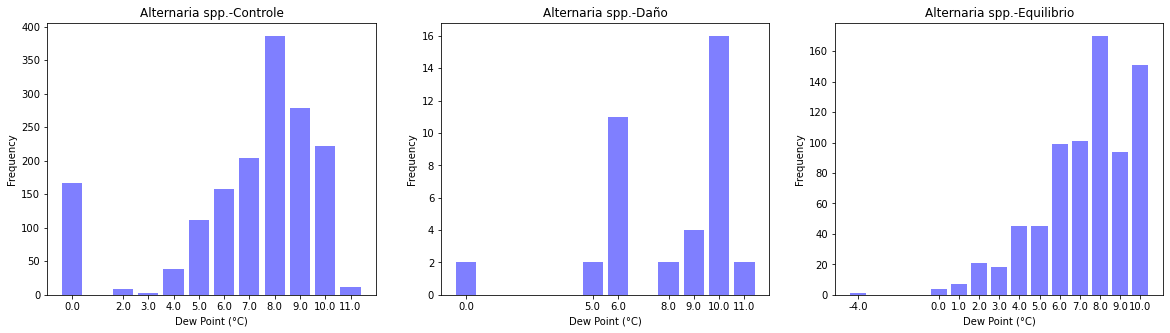

Controle


In [23]:
import matplotlib.pyplot as plt

problems = list(prob.index)
problems = ['Alternaria spp.']
#fig1 = plt.figure(figsize=(14, 5))
fig1 = plt.figure(figsize=(20, 5))
for i in range(len(problems)):
    for j in range(len(sev)):
        
        ax1 = fig1.add_subplot(len(problems), 3,(i*3) + (j+1))

        #p = 'Alternaria spp.'
        #col = 'Dew Point (°C)'
        p = problems[i]
        col = 'Dew Point (°C)'
        s = sev[j]
        val = prob_dicts[p+sep+s][col][0]
        xs = list(np.arange(0, len(val)))
        freq = prob_dicts[p+sep+s][col][1]
        #print(xs,val, freq, sep='\n')

        ax1.set_xticks(val)
        ax1.set_xticklabels([str(x) for x in val])
        ax1.bar(val, freq, color=(0,0,1,0.5))
        ax1.set_title(p + sep + s)
        plt.ylabel('Frequency')
        plt.xlabel(col)

plt.show()
print(sev[0])

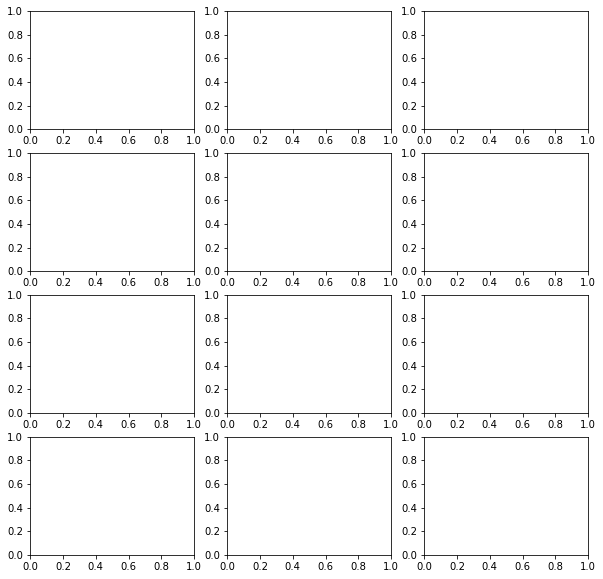

In [125]:
fig1 = plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(3):
        ax1 = fig1.add_subplot(4, 3, (i*3) + (j + 1))
plt.show()